# Machine Learning Models

## Imports

In [16]:
import sys
sys.path.append('..')

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from PIL import Image
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Import ML utility functions
from src.ml_model_utils import *

import os
csv_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset'))

train_paths_csv = os.path.join(csv_dir, 'balanced_train_paths.csv')
test_paths_csv = os.path.join(csv_dir, 'balanced_test_paths.csv')

train_csv = os.path.join(csv_dir, 'balanced_train.csv')
test_csv = os.path.join(csv_dir, 'balanced_test.csv')

In [17]:
balanced_train_image_paths = pd.read_csv(train_paths_csv)['image_path'].tolist()
balanced_test_image_paths = pd.read_csv(test_paths_csv)['image_path'].tolist()

In [18]:
balanced_train_image = pd.read_csv(train_csv)
balanced_test_image = pd.read_csv(test_csv)

In [19]:
balanced_train_image

,filename,Original Emotion,Emotion
0,Training_61913048.jpg,angry,angry
1,Training_53481967.jpg,angry,angry
2,Training_54225626.jpg,angry,angry
3,Training_80351159.jpg,angry,angry
4,Training_14417147.jpg,angry,angry
...,...,...,...
8995,Training_60414650.jpg,surprise,surprise
8996,Training_5301428.jpg,surprise,surprise
8997,Training_91683315.jpg,surprise,surprise
8998,Training_11693705.jpg,surprise,surprise


## Feature Extraction

#### Using model VGG16 without the classification layers

**VGG16** is a convolutional neural network (CNN) architecture developed by the Visual Geometry Group at the University of Oxford. It’s known for its deep yet simple architecture made up of 13 convolutional layers and 3 fully connected (FC) layers. Instead of training a model from scratch, we can use pretrained models like VGG16, which have already learned to detect low-level and mid-level features (like edges, textures, shapes) from large datasets like ImageNet. 

For this case, we removed the top layers (classification layers) and keep only the convolutional base.

**- Benefits**
- Faster training — no need to learn low-level features from scratch.
- High accuracy even with small datasets.
- Useful as a first step before trying more complex deep learning models.

In [20]:
# Data Augmentation for better generalization
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [21]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [22]:
# Fine-tuning VGG16
vgg_model.trainable = True
for layer in vgg_model.layers[:15]:
    layer.trainable = False

In [23]:
# Train Feature Extraction
X = extract_features(balanced_train_image_paths, vgg_model, datagen)
y = balanced_train_image["Emotion"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [24]:
# Test Feature Extraction
X_test = extract_features(balanced_test_image_paths, vgg_model, datagen)
y_test = balanced_test_image["Emotion"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

## Train, Validation and Test

In [25]:
# Dividir en conjunto de train (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## SVM (SVC) model

The **SVC (Support Vector Classification)** class from `sklearn.svm` is a popular supervised learning model used for classification tasks. It's based on the Support Vector Machine (SVM) algorithm, which is especially effective for high-dimensional spaces like image feature vectors extracted from models like VGG16. The main idea is that SVC finds the hyperplane that best separates the classes in the feature space. It maximizes the margin between the closest points of different classes, called support vectors.

In [28]:
# Train and evaluate the SVM model
clf = train_and_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test)

Validation Classification Report:
              precision    recall  f1-score   support

       angry       0.31      0.27      0.29       300
        fear       0.24      0.18      0.20       300
       happy       0.44      0.39      0.41       300
     neutral       0.35      0.36      0.35       300
         sad       0.30      0.37      0.33       300
    surprise       0.49      0.62      0.55       300

    accuracy                           0.36      1800
   macro avg       0.36      0.36      0.36      1800
weighted avg       0.36      0.36      0.36      1800

Test Classification Report:
              precision    recall  f1-score   support

       angry       0.31      0.29      0.30       375
        fear       0.27      0.20      0.23       375
       happy       0.45      0.38      0.41       375
     neutral       0.34      0.37      0.35       375
         sad       0.32      0.39      0.35       375
    surprise       0.51      0.61      0.56       375

    accuracy   

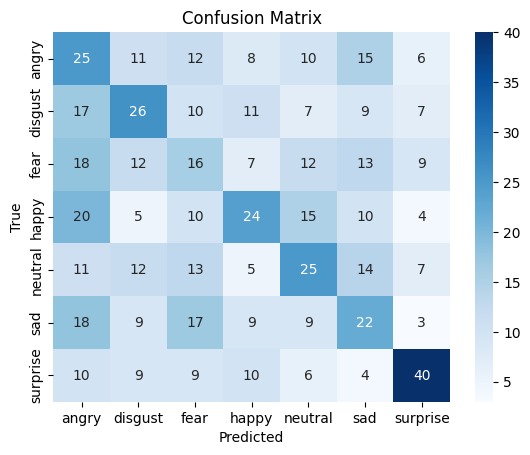

In [ ]:
y_pred_val = clf.predict(X_val)
evaluate_classification_metrics(y_val, y_pred_val, classes=balanced_train_image["Emotion"].unique(), title="Validation Confusion Matrix")

y_pred_test = clf.predict(X_test)
evaluate_classification_metrics(y_test, y_pred_test, classes=balanced_train_image["Emotion"].unique(), title="Test Confusion Matrix")

## Random Forest

The **Random Forest (RF)** classifier from `sklearn.ensemble` is a versatile and widely used supervised learning model for classification tasks. It belongs to the ensemble learning family, where multiple decision trees are combined to create a robust model. The main idea behind Random Forest is to build a collection of decision trees during training, each trained on random subsets of the data, and then combine their predictions through a majority voting mechanism.

Random Forests are particularly effective for high-dimensional data like image features extracted by deep learning models such as VGG16. They work by randomly selecting subsets of features and data points, which helps in reducing overfitting and improving generalization. The model also computes feature importance, helping to identify which features contribute most to the classification task.

In [ ]:
# Train and evaluate the Random Forest model
clf_rf = train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test)

Random Forest Classification Report:

              precision    recall  f1-score   support

       angry       0.21      0.24      0.22        87
     disgust       0.23      0.25      0.24        87
        fear       0.18      0.15      0.16        87
       happy       0.28      0.24      0.26        88
     neutral       0.28      0.22      0.25        87
         sad       0.16      0.16      0.16        87
    surprise       0.42      0.55      0.48        88

    accuracy                           0.26       611
   macro avg       0.25      0.26      0.25       611
weighted avg       0.25      0.26      0.25       611



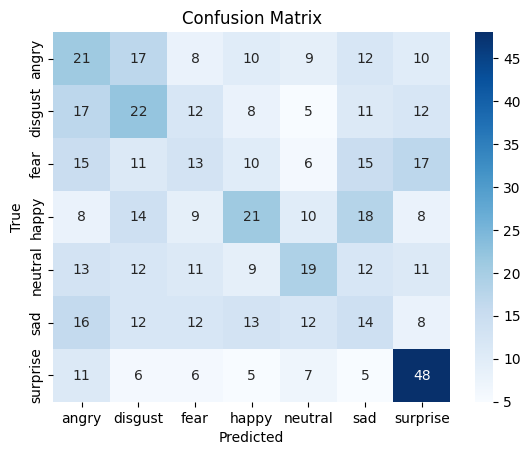

In [ ]:
y_pred_val = clf_rf.predict(X_val)
evaluate_classification_metrics(y_val, y_pred_val, classes=balanced_train_image["Emotion"].unique(), title="Validation Confusion Matrix")

y_pred_test = clf_rf.predict(X_test)
evaluate_classification_metrics(y_test, y_pred_test, classes=balanced_train_image["Emotion"].unique(), title="Test Confusion Matrix")